# Predicting House Sale Prices

Full project repolitory link: https://github.com/CarloH-AI/simple_ml_project.git

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # To plot graphs
import seaborn as sns               # To plot graphs
import gdown                       # To download the dataset from Google Drive

## Data loading and cleaning

First, we download the dataset

In [5]:
url = 'https://drive.google.com/uc?id=1AGULp0pkSTMzfSfpY8G3jbaWKaI-8fuh'
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1AGULp0pkSTMzfSfpY8G3jbaWKaI-8fuh
To: /Users/carlo.sartori/Desktop/simple_ml_project/dataset.csv
100%|██████████| 1.51M/1.51M [00:00<00:00, 5.63MB/s]


'dataset.csv'

In [9]:
df = pd.read_csv('dataset.csv').set_index('Unnamed: 0') # Load to pandas dataframe
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Alley,Lot_Shape,Land_Contour,Lot_Config,Land_Slope,Neighborhood,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,No_Alley_Access,Slightly_Irregular,Lvl,Corner,Gtl,North_Ames,...,No_Fence,NaN,0.0,5.0,2010.0,WD,Normal,215000.0,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,No_Alley_Access,Regular,Lvl,Inside,Gtl,North_Ames,...,Minimum_Privacy,NaN,0.0,6.0,2010.0,WD,Normal,105000.0,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,No_Alley_Access,Slightly_Irregular,Lvl,Corner,Gtl,North_Ames,...,No_Fence,Gar2,12500.0,6.0,2010.0,WD,Normal,172000.0,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,No_Alley_Access,Regular,Lvl,Corner,Gtl,North_Ames,...,No_Fence,NaN,0.0,4.0,2010.0,WD,Normal,244000.0,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,No_Alley_Access,Slightly_Irregular,Lvl,Inside,Gtl,Gilbert,...,Minimum_Privacy,NaN,0.0,3.0,2010.0,WD,Normal,189900.0,-93.638933,42.060899


What is the shape of the dataset?

In [10]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataset has 2930 rows and 75 columns.


Get information about the dataset (data types, number of non-null values, etc.)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   float64
 3   Lot_Area            2930 non-null   float64
 4   Alley               2930 non-null   object 
 5   Lot_Shape           2930 non-null   object 
 6   Land_Contour        2930 non-null   object 
 7   Lot_Config          2930 non-null   object 
 8   Land_Slope          2930 non-null   object 
 9   Neighborhood        2930 non-null   object 
 10  Condition_1         2930 non-null   object 
 11  Bldg_Type           2930 non-null   object 
 12  House_Style         2930 non-null   object 
 13  Overall_Qual        2930 non-null   object 
 14  Overall_Cond        2930 non-null   object 
 15  Year_Built          2930 non-null   float64
 16  Year_Remod_

I can see that there are no missing values. This fact is confirmed by the following result:

In [12]:
# Check if there is some NaN values
if (df.isnull().values.any()) == True:
    print('There are NaN values in the dataset.')
else:
    print('There are no NaN values in the dataset.')

There are NaN values in the dataset.


Description of the dataset (mean, standard deviation, quartiles, etc.)

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lot_Frontage,2930.0,57.647782,33.499441,0.000000,43.000000,63.000000,78.000000,313.000000
Lot_Area,2930.0,10147.921843,7880.017759,1300.000000,7440.250000,9436.500000,11555.250000,215245.000000
Year_Built,2930.0,1971.356314,30.245361,1872.000000,1954.000000,1973.000000,2001.000000,2010.000000
Year_Remod_Add,2930.0,1984.266553,20.860286,1950.000000,1965.000000,1993.000000,2004.000000,2010.000000
Mas_Vnr_Area,2930.0,101.096928,178.634545,0.000000,0.000000,0.000000,162.750000,1600.000000
BsmtFin_SF_1,2930.0,4.177474,2.233372,0.000000,3.000000,3.000000,7.000000,7.000000
BsmtFin_SF_2,2930.0,49.705461,169.142089,0.000000,0.000000,0.000000,0.000000,1526.000000
Bsmt_Unf_SF,2930.0,559.071672,439.540571,0.000000,219.000000,465.500000,801.750000,2336.000000
Total_Bsmt_SF,2930.0,1051.255631,440.968018,0.000000,793.000000,990.000000,1301.500000,6110.000000
First_Flr_SF,2930.0,1159.557679,391.890885,334.000000,876.250000,1084.000000,1384.000000,5095.000000


## Exploratory data analysis
Here we want to better understand the data we are going to handle. At this stage, you might choose to drop some attributes, transofrm them or you might also integrate your data with other data sources.


For the sake of the project, we will quickly analyze few interesting attributes and continue with the predictive task.

First, we analyze the variable to predict. Here we can see if the problem is "balanced". This might affect how we evaluate our models (e.g. accuraci vs f1 score for classification tasks).


The cheapest house costs $12789.0 and the most expensive house costs $755000.0
The average house costs $180796.0600682594
The median house costs $160000.0


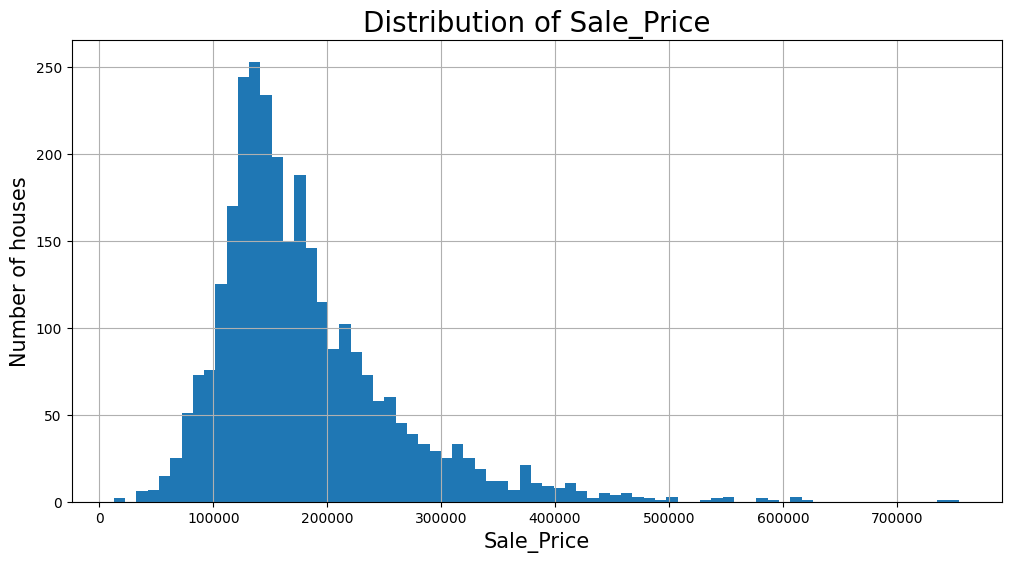

In [14]:
print('The cheapest house costs ${} and the most expensive house costs ${}'
    .format(df['Sale_Price'].min(), df['Sale_Price'].max()))
print('The average house costs ${}'.format(df['Sale_Price'].mean()))
print('The median house costs ${}'.format(df['Sale_Price'].median()))

#Let's to see the distribution of the Sale_Price
df.Sale_Price.hist(bins=75, figsize=(12,6))

plt.title('Distribution of Sale_Price', fontsize=20)
plt.xlabel('Sale_Price', fontsize=15)
plt.ylabel('Number of houses', fontsize=15)
plt.show()

In [15]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()
corr.style.background_gradient(cmap='coolwarm')

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Sale_Price,Longitude,Latitude
Lot_Frontage,1.000000,0.136862,0.026130,0.069509,0.109858,0.066707,-0.005254,0.139290,0.206080,0.241707,-0.002813,0.019315,0.186767,0.019554,-0.031798,0.082826,-0.029367,0.112718,0.022127,0.200488,0.051240,0.142774,0.186780,0.001162,0.085480,0.024824,0.004061,0.045789,0.109439,0.003098,0.017357,-0.011737,0.201875,-0.022051,0.046942
Lot_Area,0.136862,1.000000,0.023258,0.021682,0.125950,-0.045760,0.083198,0.023883,0.253765,0.332235,0.032996,0.000812,0.285599,0.124208,0.026448,0.127433,0.035497,0.136569,-0.020301,0.216597,0.256989,0.179456,0.212749,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549,-0.098612,-0.036629
Year_Built,0.026130,0.023258,1.000000,0.612095,0.306797,-0.179373,-0.027328,0.129311,0.407764,0.310463,0.016828,-0.144282,0.241726,0.212119,-0.030515,0.469406,0.269268,-0.055093,-0.137852,0.111919,0.170672,0.537982,0.480726,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426,-0.425568,0.251397
Year_Remod_Add,0.069509,0.021682,0.612095,1.000000,0.191740,-0.050840,-0.061934,0.165397,0.298393,0.242108,0.158939,-0.060365,0.316855,0.134590,-0.046175,0.457266,0.211771,-0.021536,-0.142404,0.197528,0.133322,0.424416,0.375566,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974,-0.323822,0.181050
Mas_Vnr_Area,0.109858,0.125950,0.306797,0.191740,1.000000,-0.107222,-0.014955,0.089662,0.393530,0.392280,0.120159,-0.057173,0.400703,0.139684,0.016609,0.254471,0.188703,0.080590,-0.050733,0.278418,0.270051,0.356831,0.370479,0.165875,0.140003,-0.109915,0.014222,0.066817,0.004893,0.045276,-0.002358,-0.016876,0.502196,-0.081546,0.216882
BsmtFin_SF_1,0.066707,-0.045760,-0.179373,-0.050840,-0.107222,1.000000,-0.121751,0.488014,-0.163311,-0.123074,0.159652,0.071317,0.046419,-0.473424,-0.114581,0.051531,0.034869,0.108739,0.103491,0.107549,-0.143130,-0.077813,-0.096932,-0.146419,-0.002644,0.098732,-0.048145,-0.044111,-0.025391,-0.042043,0.017495,-0.035765,-0.134905,0.061665,0.005937
BsmtFin_SF_2,-0.005254,0.083198,-0.027328,-0.061934,-0.014955,-0.121751,1.000000,-0.238420,0.090109,0.084710,-0.098188,-0.004989,-0.017996,0.163634,0.099147,-0.076262,-0.033004,-0.033033,-0.037864,-0.049288,0.067180,-0.014118,0.003625,0.098591,-0.005516,0.032415,-0.023314,0.062978,0.044403,-0.005195,-0.009401,0.007089,0.006018,-0.025502,-0.021714
Bsmt_Unf_SF,0.139290,0.023883,0.129311,0.165397,0.089662,0.488014,-0.238420,1.000000,0.412248,0.296139,0.002320,0.047207,0.235870,-0.398629,-0.105784,0.274901,-0.033530,0.188508,0.065651,0.251633,0.001790,0.180080,0.164837,-0.039285,0.119143,0.006383,-0.005399,-0.047945,-0.031963,-0.010125,0.021915,-0.036443,0.183308,-0.048123,0.161017
Total_Bsmt_SF,0.206080,0.253765,0.407764,0.298393,0.393530,-0.163311,0.090109,0.412248,1.000000,0.800429,-0.204487,-0.023180,0.445108,0.326861,0.012850,0.325434,-0.054557,0.052721,-0.038612,0.281627,0.333467,0.437856,0.485608,0.230290,0.245941,-0.084848,0.037918,0.075499,0.072109,0.083895,0.017325,-0.010524,0.632529,-0.161092,0.175561
First_Flr_SF,0.241707,0.332235,0.310463,0.242108,0.392280,-0.123074,0.084710,0.296139,0.800429,1.000000,-0.250057,-0.012689,0.562166,0.257836,0.010469,0.371584,-0.104203,0.106648,0.076025,0.390162,0.406345,0.439471,0.491208,0.227131,0.238041,-0.065713,0.044061,0.098316,0.121821,0.093003,0.040496,-0.013667,0.621676,-0.135877,0.129733


We can see that correlation between Garage_Cars and Garage_Area is very hight. This indicated a strong dependence between the two variables.
In this case we can choose to drop one of them since they provide redundant information.

In [16]:
df = df.drop('Garage_Cars', axis='columns')

## Data pre-processing

### Investigate the distribution of nominal features

In [17]:
# Count how many nominal, ordinal, continuous and discrete features there are in the dataset
nominal = 0
ordinal = 0
continuous = 0
discrete = 0
for col in df.columns:
    if df[col].dtype == 'object':
        nominal += 1
    elif df[col].dtype == 'int64':
        discrete += 1
    elif df[col].dtype == 'float64':
        continuous += 1
    else:
        ordinal += 1

print('There are {} nominal features, {} ordinal features, {} continuous features and {} discrete features.'.format(nominal, ordinal, continuous, discrete))

There are 40 nominal features, 0 ordinal features, 34 continuous features and 0 discrete features.


**Be careful: you should check if ordinal features represent a quantity (treat them as numbers) or a category (you shoudl then convert them in vectors with dummy variables)**

In our case we have 0 ordinal features.

### One hot encoding of nomianl features

In [18]:
# Creating an empty list to store the nominal features
nominal_features = []

print('The nominal features are:')
for i in df.select_dtypes(include=['object']).columns:
    print('-', i)
    # Creating a list with the nominal features, to use it later
    nominal_features.append(i)

The nominal features are:
- MS_SubClass
- MS_Zoning
- Alley
- Lot_Shape
- Land_Contour
- Lot_Config
- Land_Slope
- Neighborhood
- Condition_1
- Bldg_Type
- House_Style
- Overall_Qual
- Overall_Cond
- Roof_Style
- Exterior_1st
- Exterior_2nd
- Mas_Vnr_Type
- Exter_Qual
- Exter_Cond
- Foundation
- Bsmt_Qual
- Bsmt_Cond
- Bsmt_Exposure
- BsmtFin_Type_1
- BsmtFin_Type_2
- Heating_QC
- Central_Air
- Electrical
- Kitchen_Qual
- Functional
- Fireplace_Qu
- Garage_Type
- Garage_Finish
- Garage_Qual
- Garage_Cond
- Paved_Drive
- Fence
- Misc_Feature
- Sale_Type
- Sale_Condition


In [19]:
# Use the get_dummies function to create dummy variables for the nominal features,
# but maintaining the original features

# Considering the nominal features can be used as categorical variables, we can use
# the get_dummies function to create dummy variables for them in an another dataframe
df_dummy = df.copy()
df_dummy = pd.get_dummies(df, columns=nominal_features)

# Checking the shape of the dataframe
print('The shape of the dataframe is:', df.shape[0], 'rows and', df.shape[1], 'features.')
print('The shape of the dataframe with dummy variables is:', df_dummy.shape[0], 'rows and',
    df_dummy.shape[1], 'features.')

The shape of the dataframe is: 2930 rows and 74 features.
The shape of the dataframe with dummy variables is: 2930 rows and 318 features.


In [20]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Alley,Lot_Shape,Land_Contour,Lot_Config,Land_Slope,Neighborhood,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,No_Alley_Access,Slightly_Irregular,Lvl,Corner,Gtl,North_Ames,...,No_Fence,NaN,0.0,5.0,2010.0,WD,Normal,215000.0,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,No_Alley_Access,Regular,Lvl,Inside,Gtl,North_Ames,...,Minimum_Privacy,NaN,0.0,6.0,2010.0,WD,Normal,105000.0,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,No_Alley_Access,Slightly_Irregular,Lvl,Corner,Gtl,North_Ames,...,No_Fence,Gar2,12500.0,6.0,2010.0,WD,Normal,172000.0,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,No_Alley_Access,Regular,Lvl,Corner,Gtl,North_Ames,...,No_Fence,NaN,0.0,4.0,2010.0,WD,Normal,244000.0,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,No_Alley_Access,Slightly_Irregular,Lvl,Inside,Gtl,Gilbert,...,Minimum_Privacy,NaN,0.0,3.0,2010.0,WD,Normal,189900.0,-93.638933,42.060899


In [21]:
df_dummy.head()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,141.0,31770.0,1960.0,1960.0,112.0,2.0,0.0,441.0,1080.0,1656.0,...,False,False,False,True,False,False,False,False,True,False
1,80.0,11622.0,1961.0,1961.0,0.0,6.0,144.0,270.0,882.0,896.0,...,False,False,False,True,False,False,False,False,True,False
2,81.0,14267.0,1958.0,1958.0,108.0,1.0,0.0,406.0,1329.0,1329.0,...,False,False,False,True,False,False,False,False,True,False
3,93.0,11160.0,1968.0,1968.0,0.0,1.0,0.0,1045.0,2110.0,2110.0,...,False,False,False,True,False,False,False,False,True,False
4,74.0,13830.0,1997.0,1998.0,0.0,3.0,0.0,137.0,928.0,928.0,...,False,False,False,True,False,False,False,False,True,False


In [22]:
df_dummy.columns.values

array(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF',
       'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Area',
       'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch',
       'Three_season_porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val',
       'Mo_Sold', 'Year_Sold', 'Sale_Price', 'Longitude', 'Latitude',
       'MS_SubClass_Duplex_All_Styles_and_Ages',
       'MS_SubClass_One_Story_1945_and_Older',
       'MS_SubClass_One_Story_1946_and_Newer_All_Styles',
       'MS_SubClass_One_Story_PUD_1946_and_Newer',
       'MS_SubClass_One_Story_with_Finished_Attic_All_Ages',
       'MS_SubClass_One_and_Half_Story_Finished_All_Ages',
       'MS_SubClass_One_and_Half_Story_PUD_All_Ages',
       'MS_SubClass_One_and_Half

Again, we might want to drop highly correlated variables

In [23]:
df_dummy.corr().abs()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
Lot_Frontage,1.000000,0.136862,0.026130,0.069509,0.109858,0.066707,0.005254,0.139290,0.206080,0.241707,...,0.166197,0.000097,0.015089,0.136702,0.018493,0.007463,0.012826,0.019772,0.140954,0.166324
Lot_Area,0.136862,1.000000,0.023258,0.021682,0.125950,0.045760,0.083198,0.023883,0.253765,0.332235,...,0.032328,0.003937,0.008495,0.015027,0.014079,0.020244,0.024450,0.018232,0.024052,0.034169
Year_Built,0.026130,0.023258,1.000000,0.612095,0.306797,0.179373,0.027328,0.129311,0.407764,0.310463,...,0.343270,0.013985,0.008161,0.203243,0.120844,0.077805,0.025238,0.036261,0.137162,0.338843
Year_Remod_Add,0.069509,0.021682,0.612095,1.000000,0.191740,0.050840,0.061934,0.165397,0.298393,0.242108,...,0.325432,0.027105,0.012167,0.156367,0.146235,0.078199,0.034022,0.049793,0.102775,0.323105
Mas_Vnr_Area,0.109858,0.125950,0.306797,0.191740,1.000000,0.107222,0.014955,0.089662,0.393530,0.392280,...,0.148301,0.022064,0.024716,0.093210,0.040828,0.018197,0.019554,0.017162,0.065964,0.145432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sale_Condition_AdjLand,0.007463,0.020244,0.077805,0.078199,0.018197,0.033194,0.018848,0.006382,0.042691,0.028528,...,0.019111,0.003138,0.001185,0.025277,0.016887,1.000000,0.005828,0.008099,0.138542,0.019371
Sale_Condition_Alloca,0.012826,0.024450,0.025238,0.034022,0.019554,0.005527,0.026711,0.060993,0.044343,0.041764,...,0.027083,0.004447,0.001679,0.035820,0.023931,0.005828,1.000000,0.011477,0.196332,0.027452
Sale_Condition_Family,0.019772,0.018232,0.036261,0.049793,0.017162,0.051439,0.002085,0.024475,0.003753,0.000432,...,0.037638,0.050057,0.002334,0.014601,0.033257,0.008099,0.011477,1.000000,0.272844,0.038150
Sale_Condition_Normal,0.140954,0.024052,0.137162,0.102775,0.065964,0.097930,0.069230,0.150107,0.139299,0.141705,...,0.643836,0.087383,0.008553,0.620601,0.568899,0.138542,0.196332,0.272844,1.000000,0.652596


In [24]:
corr = df_dummy.corr()
#we set the diagonal to zero
for i in range(len(df_dummy.columns)):
  corr.iloc[i,i]=0
# disp(corr.head())

#we now extract the top correlated pairs:
top_corr = corr.abs().unstack().sort_values(ascending=False)
top_corr = top_corr[top_corr>0.9]
top_corr

Exterior_2nd_PreCast                                   Exterior_1st_PreCast                                     1.000000
Garage_Qual_No_Garage                                  Garage_Cond_No_Garage                                    1.000000
Bsmt_Qual_No_Basement                                  BsmtFin_Type_1_No_Basement                               1.000000
Bsmt_Cond_No_Basement                                  BsmtFin_Type_1_No_Basement                               1.000000
Exterior_1st_PreCast                                   Exterior_2nd_PreCast                                     1.000000
Garage_Finish_No_Garage                                Garage_Cond_No_Garage                                    1.000000
                                                       Garage_Qual_No_Garage                                    1.000000
MS_SubClass_Duplex_All_Styles_and_Ages                 Bldg_Type_Duplex                                         1.000000
Bsmt_Qual_No_Basement           

In [26]:
corr_pairs = []
corr_abs = corr.abs()
for c in corr.columns:
  for r in corr.columns:
    corr_pairs.append((corr_abs.loc[r,c],r,c))
# corr_pairs


In [27]:
to_be_removed = [i[0] for i in top_corr.index]
to_be_removed = set(to_be_removed)-set(['Sale_Price'])
to_be_removed

{'Bldg_Type_Duplex',
 'Bldg_Type_TwoFmCon',
 'BsmtFin_Type_1_No_Basement',
 'BsmtFin_Type_2_No_Basement',
 'Bsmt_Cond_No_Basement',
 'Bsmt_Exposure_No_Basement',
 'Bsmt_Qual_No_Basement',
 'Central_Air_N',
 'Central_Air_Y',
 'Exter_Qual_Good',
 'Exter_Qual_Typical',
 'Exterior_1st_CemntBd',
 'Exterior_1st_MetalSd',
 'Exterior_1st_PreCast',
 'Exterior_1st_VinylSd',
 'Exterior_2nd_CmentBd',
 'Exterior_2nd_MetalSd',
 'Exterior_2nd_PreCast',
 'Exterior_2nd_VinylSd',
 'Garage_Cond_No_Garage',
 'Garage_Finish_No_Garage',
 'Garage_Qual_No_Garage',
 'Garage_Type_No_Garage',
 'House_Style_One_and_Half_Fin',
 'House_Style_SLvl',
 'Land_Slope_Gtl',
 'Land_Slope_Mod',
 'Lot_Shape_Regular',
 'Lot_Shape_Slightly_Irregular',
 'MS_SubClass_Duplex_All_Styles_and_Ages',
 'MS_SubClass_One_and_Half_Story_Finished_All_Ages',
 'MS_SubClass_Split_or_Multilevel',
 'MS_SubClass_Two_Family_conversion_All_Styles_and_Ages',
 'Roof_Style_Gable',
 'Roof_Style_Hip',
 'Sale_Condition_Partial',
 'Sale_Type_New'}

In [28]:
#and drop one of them
df_dummy = df_dummy.drop(to_be_removed, axis=1)
df_dummy.head(5)

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,141.0,31770.0,1960.0,1960.0,112.0,2.0,0.0,441.0,1080.0,1656.0,...,False,False,False,False,True,False,False,False,False,True
1,80.0,11622.0,1961.0,1961.0,0.0,6.0,144.0,270.0,882.0,896.0,...,False,False,False,False,True,False,False,False,False,True
2,81.0,14267.0,1958.0,1958.0,108.0,1.0,0.0,406.0,1329.0,1329.0,...,False,False,False,False,True,False,False,False,False,True
3,93.0,11160.0,1968.0,1968.0,0.0,1.0,0.0,1045.0,2110.0,2110.0,...,False,False,False,False,True,False,False,False,False,True
4,74.0,13830.0,1997.0,1998.0,0.0,3.0,0.0,137.0,928.0,928.0,...,False,False,False,False,True,False,False,False,False,True


## Model training and selection

### Dataset creation

It's now time to build our vectorial representation and create all the splits (train/validation/test)

In [29]:
df_dummy

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,141.0,31770.0,1960.0,1960.0,112.0,2.0,0.0,441.0,1080.0,1656.0,...,False,False,False,False,True,False,False,False,False,True
1,80.0,11622.0,1961.0,1961.0,0.0,6.0,144.0,270.0,882.0,896.0,...,False,False,False,False,True,False,False,False,False,True
2,81.0,14267.0,1958.0,1958.0,108.0,1.0,0.0,406.0,1329.0,1329.0,...,False,False,False,False,True,False,False,False,False,True
3,93.0,11160.0,1968.0,1968.0,0.0,1.0,0.0,1045.0,2110.0,2110.0,...,False,False,False,False,True,False,False,False,False,True
4,74.0,13830.0,1997.0,1998.0,0.0,3.0,0.0,137.0,928.0,928.0,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937.0,1984.0,1984.0,0.0,3.0,0.0,184.0,1003.0,1003.0,...,False,False,False,False,True,False,False,False,False,True
2926,0.0,8885.0,1983.0,1983.0,0.0,2.0,324.0,239.0,864.0,902.0,...,False,False,False,False,True,False,False,False,False,True
2927,62.0,10441.0,1992.0,1992.0,0.0,3.0,0.0,575.0,912.0,970.0,...,False,False,False,False,True,False,False,False,False,True


We now create a numpy array for the independent variables (X) and one for the dependent variable to predict (y)

In [30]:
X = df_dummy.drop('Sale_Price',axis='columns').values.astype('float32')
y = df_dummy['Sale_Price'].values.astype('float32')

In [31]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

X_train_80, X_test, y_train_80, y_test = train_test_split(X, y,
                                                          test_size=0.20, random_state=4)

# we select 0.25 of the training set as validation (i.e. 20% on the total dataset)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_80, y_train_80,
                                                      test_size=0.25, random_state=1)

### Model training and validation
We now eplore the performance of one or model ML algorithms with different hyper-parameters, training on the training set and assessing the best model on the validation set.

We also rescale original values, since they are not comparable in the original dataset.

For this warmup we will consider just one algorithm.

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error #since its a regression task, we are going to evaluate the MSE

#we should evaluate which hypermarameter we want to explore. For the KNR we have just a few:
#- n_neighbors -> 5 - 50
#- weights -> ‘uniform’, ‘distance’
# Have a look at the documentation to know more about this algorithm.

n_neighbors = np.linspace(5,50,10).astype('int32')
weights = ['uniform','distance']

models = []
val_errors = []
train_errors = []

for cur_n_neighbors in n_neighbors: #hyperparameters to explore
  for cur_weights in weights:
    model = Pipeline([('scaler', preprocessing.StandardScaler()), ('cla', KNeighborsRegressor(n_neighbors=cur_n_neighbors, weights=cur_weights))])
    model.fit(X_train,y_train)
    models.append(model)

    # compute F1 SCORE on train and validation
    train_err = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)) #we use the F1 score since the dataset is unbalanced
    valid_err = mean_squared_error(y_true=y_valid, y_pred=model.predict(X_valid))

    print(">> %.3f  %.3f" % (train_err,valid_err))
    train_errors += [ train_err ]
    val_errors += [valid_err]

>> 932562496.000  1528389888.000
>> 0.000  1500915582.816
>> 1147447936.000  1461538048.000
>> 0.000  1432636157.059
>> 1241498368.000  1561106944.000
>> 0.000  1525244971.443
>> 1329318144.000  1593858816.000
>> 0.000  1558520569.644
>> 1360027264.000  1578062720.000
>> 0.000  1546252751.048
>> 1394860288.000  1585197568.000
>> 0.000  1552592562.841
>> 1430961536.000  1603516672.000
>> 0.001  1571134516.610
>> 1471403264.000  1633864192.000
>> 0.001  1599052767.831
>> 1521384704.000  1656106368.000
>> 0.001  1619729149.232
>> 1566883456.000  1697458176.000
>> 0.001  1658242012.235


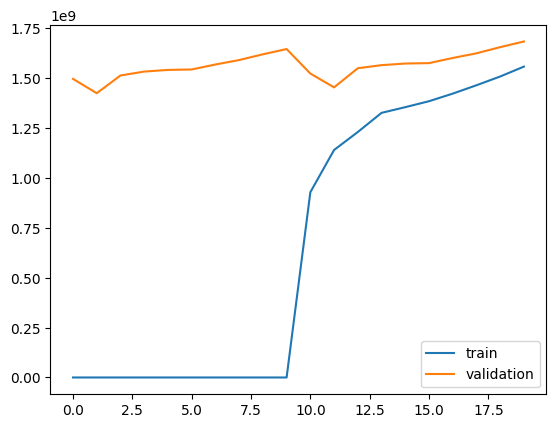

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], dtype=int32)

In [ ]:
# plot validation vs test errors at increasing model complexity
idxs = np.argsort(train_errors) #we use the train errors as a measure of the model complexity

plt.figure()
plt.plot(np.asarray(train_errors)[idxs])
plt.plot(np.asarray(val_errors)[idxs])
plt.legend(['train','validation'])
# plt.xlabel('max leaves')
plt.show()

n_neighbors

**Note:** we migt want to further inveticate which of the hyperparameters is affecting the most the underfitting/overfitting behavior of our model.
For instance, in this situation the use of "disatnce" as weights always produces a huge overfitting.

# Model testing and error analìlysis

Once we selectet our best model and architecture, we can now test it on unseen data.

In a regression task, the lower the error, the better!

In [ ]:
best_model = models[np.argmin(val_errors)]
# we use both training and validation to build the final model, to exploit all training data
best_model.fit(X_train_80,y_train_80)

# Finally, evaluate on test set
test_acc = mean_squared_error(y_true=y_test, y_pred=best_model.predict(X_test))
print ("Test F1 Score: {:.3f}".format(test_acc) )


Test F1 Score: 1286585826.787


It could be interesting to investigate what the source of the error is, and if there are any correlation between the error and the actual value...

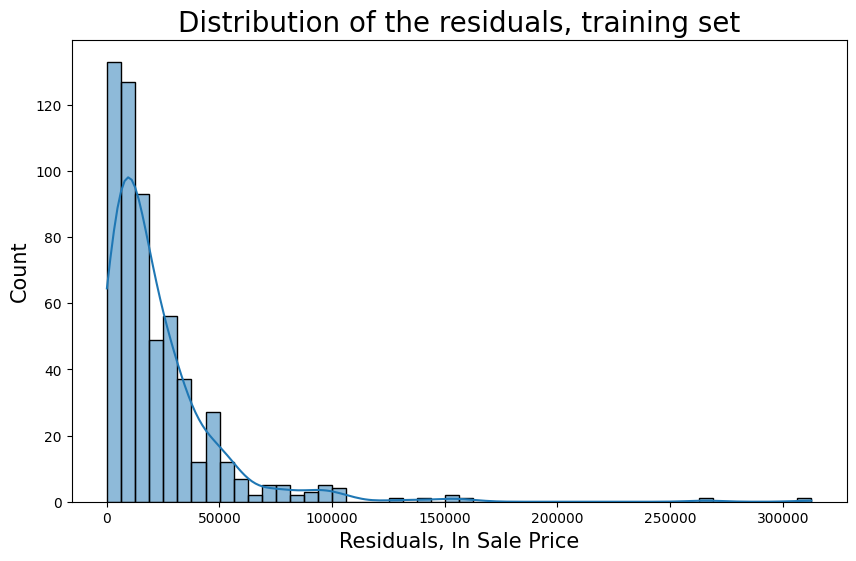

In [ ]:
test_residuals = np.abs(y_test - best_model.predict(X_test))

# Plotting the residuals of the training set
plt.figure(figsize=(10,6))
sns.histplot(test_residuals, bins=50, kde=True)
plt.title('Distribution of the residuals, training set', fontsize=20)
plt.xlabel('Residuals, ln Sale Price', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

<Axes: >

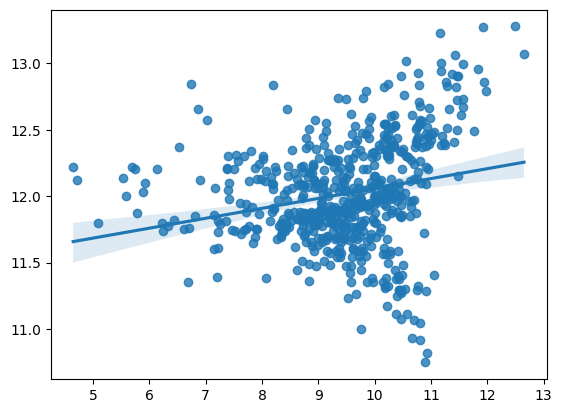

In [ ]:
import seaborn as sbs
test_residuals = np.abs(y_test - best_model.predict(X_test))

# Plotting the residuals of the training set
# plt.figure(figsize=(10,6))
# plt.scatter(test_residuals,y_test)
# plt.xscale('log')
# plt.yscale('log')
# plt.show();

sbs.regplot(x=np.log(test_residuals),y=np.log(y_test))

# Conclusions
The notebook walks through a baseline regression workflow for predicting house sale prices.
Key take-aways:

1) Data quality & feature mix – The raw dataset combines ~80 numeric and categorical attributes; categorical fields were one-hot encoded while numerics were kept in their native scale.

2) Simple model, strong baseline – A KNeighborsRegressor was tuned over n_neighbors ∈ [5, 50] and weights ∈ {uniform, distance}. After scaling the inputs, the best setting on the validation split achieved the lowest MSE and was re-trained on the full training set.

3) Error pattern – A log-log residual plot shows heavy-tailed errors: the model is accurate for mid-range prices but struggles on the expensive tail, hinting at heteroskedasticity the distance-based estimator cannot fully capture.

4) Next steps – Tree ensembles (e.g., Gradient Boosting) or target-wise transformations could help model the skew and reduce the long-price errors, while feature engineering (ratios, interaction terms) may further improve performance.